In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

In [402]:
df = pd.read_csv("model3_augmented_data.csv",encoding= 'unicode_escape')

In [403]:
df.head()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats,Target
0,2.50,0.0416,0.0104,0.0208,0.750,1.75,1.25,1.00,0.0,0.06240,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Cake
1,2.00,0.0416,0.0208,0.0208,0.000,1.50,1.00,0.00,0.0,0.03120,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Cake
2,0.25,0.0000,0.0000,0.0026,0.500,0.50,0.50,0.00,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,Cake
3,0.33,0.0000,0.0000,0.0052,0.125,1.00,0.75,0.75,0.0,0.02704,...,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.0,Cake
4,3.67,0.0416,0.0156,0.0208,1.500,2.00,1.25,1.50,0.0,0.06240,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,Cake


In [404]:
df.tail()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats,Target
2257,15.0,0.0000,0.2496,0.0312,2.355,6.0,3.0,0.0,0.0000,0.00000,...,0.00,0.0,6.0,4.5,0.0,0.0,0.0,0.0,0.0,Bread
2258,18.0,0.1248,0.0624,0.0624,6.000,6.0,4.5,0.0,0.0000,0.37440,...,0.00,0.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,Bread
2259,27.0,0.3744,0.0624,0.0624,6.000,6.0,6.0,0.0,0.0000,0.00000,...,0.00,0.0,12.0,6.0,0.0,0.0,0.0,6.0,0.0,Bread
2260,21.0,0.0000,0.2496,0.1872,0.000,13.5,6.0,0.0,0.0000,0.13104,...,4.02,0.0,12.0,0.0,0.0,0.0,0.0,6.0,3.0,Bread
2261,25.5,0.0000,0.0000,0.3744,0.000,0.0,0.0,0.0,0.3744,0.00000,...,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bread


In [405]:
df.dtypes

Flour              float64
Baking_powder      float64
Baking_soda        float64
Salt               float64
Butter             float64
Sugar              float64
Eggs               float64
Milk               float64
Yeast              float64
Vanilla_extract    float64
Cream              float64
Oil                float64
Cheese             float64
Water              float64
Cocoa_powder       float64
Fruits             float64
Nuts               float64
Other_powder       float64
Chocolate          float64
Juice              float64
Honey              float64
Oats               float64
Target              object
dtype: object

In [406]:
df.describe()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Cheese,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,...,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,8.211956,0.049724,0.041155,0.041566,1.819559,3.869264,1.736074,0.785365,0.018586,0.106188,...,0.287798,0.582722,0.168408,1.509363,0.726621,0.101459,0.995782,0.174211,0.416426,0.393495
std,6.326775,0.075206,0.065691,0.043607,1.829792,3.302292,1.861341,1.748262,0.054562,0.101614,...,1.378163,1.816699,0.661549,3.007885,1.726570,0.571002,2.082710,0.745030,1.225291,2.001221
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.515625,0.000000,0.000000,0.010400,0.250000,1.432500,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.750000,0.010400,0.020800,0.031200,1.500000,3.000000,1.250000,0.000000,0.000000,0.083200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.250000,0.083200,0.062400,0.059800,3.000000,6.000000,2.500000,0.500000,0.000000,0.166400,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,54.000000,0.561600,1.310400,0.374400,10.500000,30.000000,18.000000,12.000000,0.374400,0.468000,...,18.000000,19.500000,5.400000,24.000000,15.000000,7.500000,18.000000,12.000000,12.000000,24.000000


In [407]:
df.isnull().sum()

Flour              0
Baking_powder      0
Baking_soda        0
Salt               0
Butter             0
Sugar              0
Eggs               0
Milk               0
Yeast              0
Vanilla_extract    0
Cream              0
Oil                0
Cheese             0
Water              0
Cocoa_powder       0
Fruits             0
Nuts               0
Other_powder       0
Chocolate          0
Juice              0
Honey              0
Oats               0
Target             0
dtype: int64

## Feature Selection

### 1. Correlation Matrix with heatmap

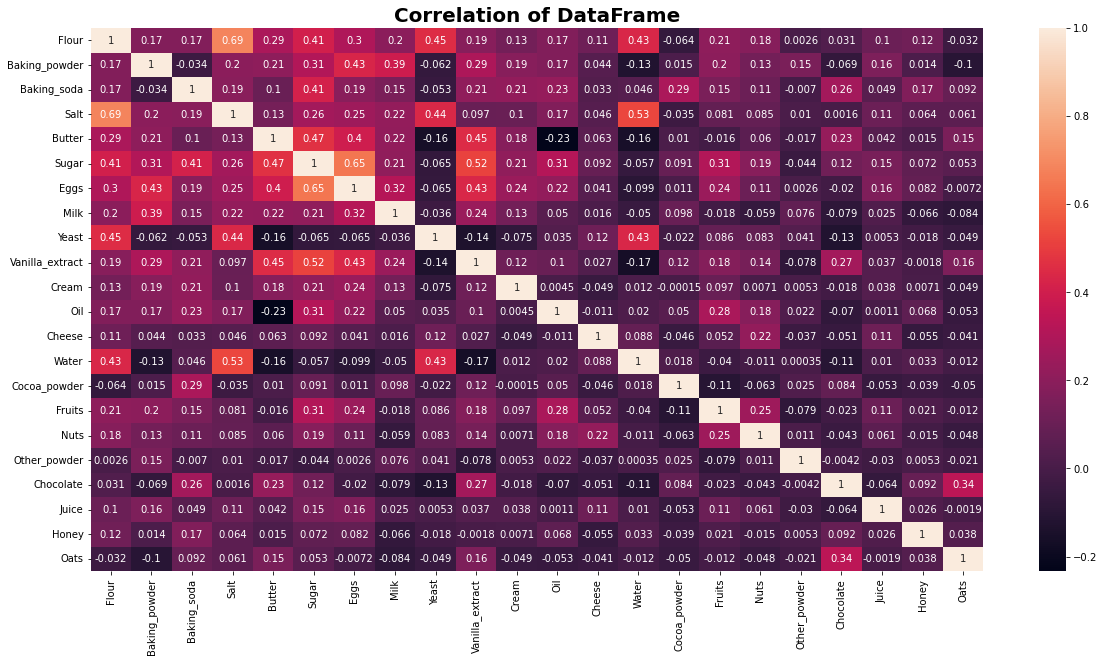

In [408]:
plt.figure(figsize=(20, 10))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(df.corr(),annot=True);

### 2.Univariate Selection

In [409]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [410]:
bestfeatures = SelectKBest(score_func = chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Ingredients','Score']
featureScores.nlargest(15,'Score')

,Ingredients,Score
18,Chocolate,1492.652999
7,Milk,1367.448474
15,Fruits,1340.603535
13,Water,1222.781233
21,Oats,1218.715989
0,Flour,947.964019
6,Eggs,870.892726
4,Butter,671.101166
11,Oil,617.480340
10,Cream,387.551095


### 3.ExtraTreesClassifier method

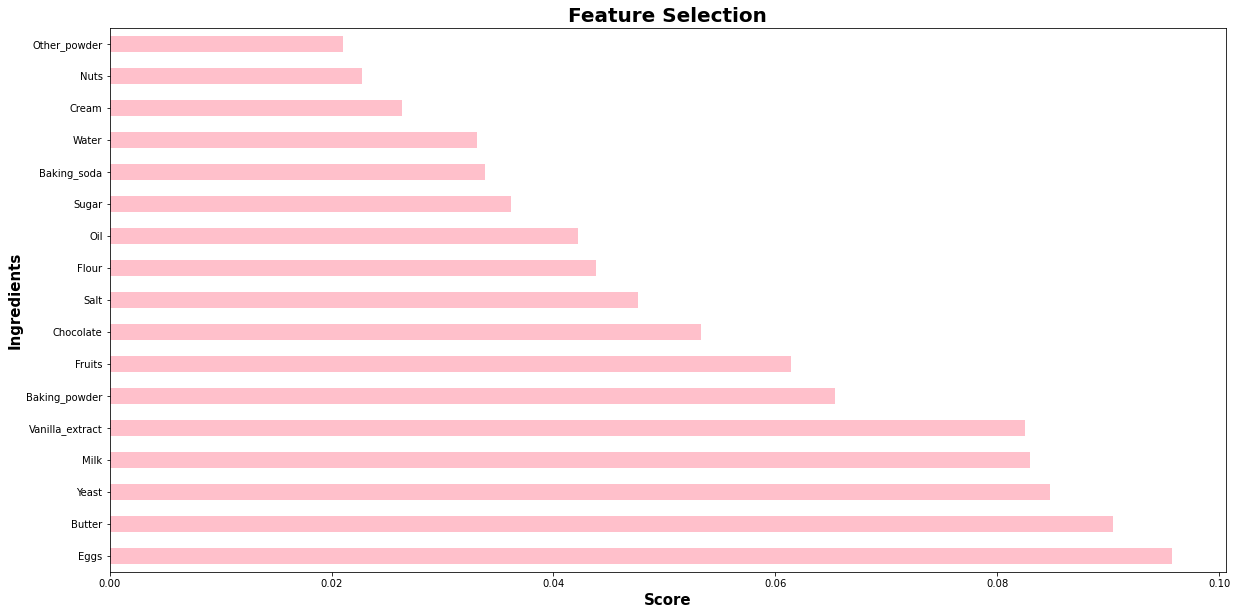

In [411]:
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(20, 10))
plt.title("Feature Selection",size='20',weight='bold')
plt.ylabel("Ingredients",size = '15',weight = 'bold')
plt.xlabel("Score",size = '15',weight = 'bold')
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest(17).plot(kind = 'barh',color='pink')
plt.show()

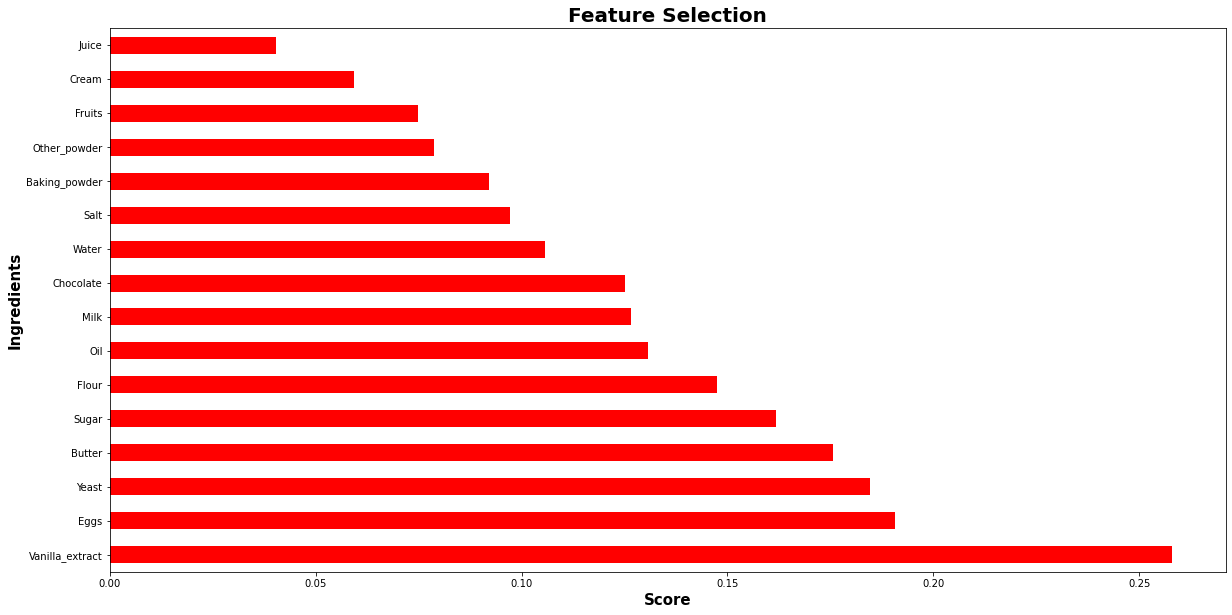

In [422]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y,random_state=2)
plt.figure(figsize=(20, 10))
plt.title("Feature Selection",size='20',weight='bold')
plt.ylabel("Ingredients",size = '15',weight = 'bold')
plt.xlabel("Score",size = '15',weight = 'bold')
mutual_data = pd.Series(mutual_info,index = X.columns)
mutual_data.nlargest(16).plot(kind = 'barh',color = 'red')
plt.show()

## Outlier Detection

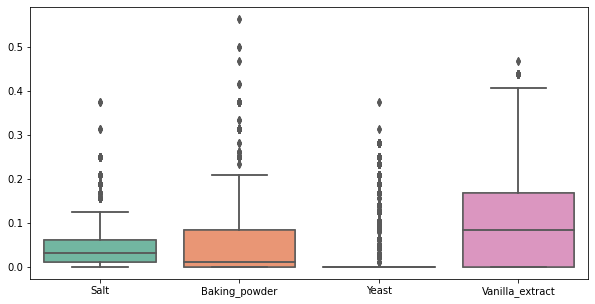

In [423]:
fig = plt.figure(figsize=(10,5))
outlier = df[['Salt','Baking_powder','Yeast','Vanilla_extract']]
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")

### 1.Qauntile based Flooring and Capping

In [424]:
Q1 = df['Salt'].quantile(0.25)
Q3 = df['Salt'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
val1 = df['Salt'].quantile(0.10)
val2 = df['Salt'].quantile(0.90)
df['Salt'] = np.where(df['Salt'] < val1, val1, df['Salt'])
df['Salt'] = np.where(df['Salt'] > val2, val2, df['Salt'])

In [425]:
Q1 = df['Baking_powder'].quantile(0.25)
Q3 = df['Baking_powder'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
val1 = df['Baking_powder'].quantile(0.10)
val2 = df['Baking_powder'].quantile(0.90)
df['Baking_powder'] = np.where(df['Baking_powder'] < val1, val1, df['Baking_powder'])
df['Baking_powder'] = np.where(df['Baking_powder'] > val2, val2, df['Baking_powder'])

In [426]:
Q1 = df['Baking_soda'].quantile(0.25)
Q3 = df['Baking_soda'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
val1 = df['Baking_soda'].quantile(0.10)
val2 = df['Baking_soda'].quantile(0.90)
df['Baking_soda'] = np.where(df['Baking_soda'] < val1, val1, df['Baking_soda'])
df['Baking_soda'] = np.where(df['Baking_soda'] > val2, val2, df['Baking_soda'])

In [427]:
Q1 = df['Vanilla_extract'].quantile(0.25)
Q3 = df['Vanilla_extract'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
val1 = df['Vanilla_extract'].quantile(0.10)
val2 = df['Vanilla_extract'].quantile(0.90)
df['Vanilla_extract'] = np.where(df['Vanilla_extract'] < val1, val1, df['Vanilla_extract'])
df['Vanilla_extract'] = np.where(df['Vanilla_extract'] > val2, val2, df['Vanilla_extract'])

In [428]:
Q1 = df['Yeast'].quantile(0.25)
Q3 = df['Yeast'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
val1 = df['Yeast'].quantile(0.10)
val2 = df['Yeast'].quantile(0.85)
df['Yeast'] = np.where(df['Yeast'] < val1, val1, df['Yeast'])
df['Yeast'] = np.where(df['Yeast'] > val2, val2, df['Yeast'])

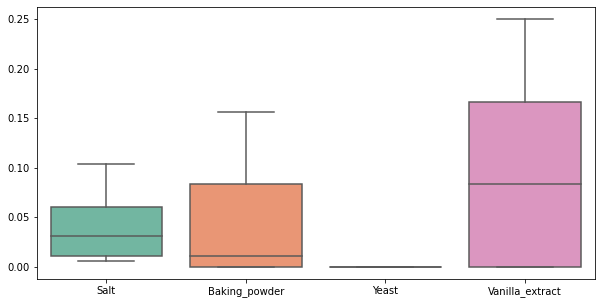

In [430]:
fig = plt.figure(figsize=(10,5))
outlier = df[['Salt','Baking_powder','Yeast','Vanilla_extract']]
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")

In [431]:
new_df = df[['Flour','Sugar','Butter','Milk','Eggs','Oil','Water','Other_powder','Fruits','Chocolate','Cream','Juice','Yeast','Vanilla_extract','Baking_powder','Salt','Target']]
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

## Feature Encoding

In [432]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Data Splitting

In [433]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,shuffle = True)

## Handling Imbalanced data

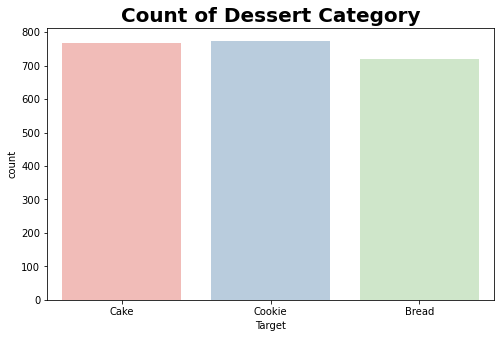

In [434]:
plt.figure(figsize=(8, 5))
plt.title("Count of Dessert Category",size='20',weight='bold')
plt.xlabel("",size='10')
plt.ylabel("",size='10')
sns.countplot(df.Target,palette='Pastel1');

### Over Sampling minority class using Synthetic Minority Oversampling Technique(SMOTE)

In [435]:
smk = SMOTETomek()
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

## Feature Scaling

In [436]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Training

In [437]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [438]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       150
           1       0.92      0.85      0.89       149
           2       0.95      0.96      0.96       158

    accuracy                           0.91       457
   macro avg       0.91      0.91      0.91       457
weighted avg       0.91      0.91      0.91       457



In [440]:
print('\nAccuracy for training set = {}'.format((cm_train[0][0] + cm_train[1][1] + cm_train[2][2])/len(y_train)))
print('Accuracy for test set = {}'.format((cm_test[0][0] + cm_test[1][1] + cm_test[2][2])/len(y_test)))


Accuracy for training set = 0.9037520391517129
Accuracy for test set = 0.912472647702407


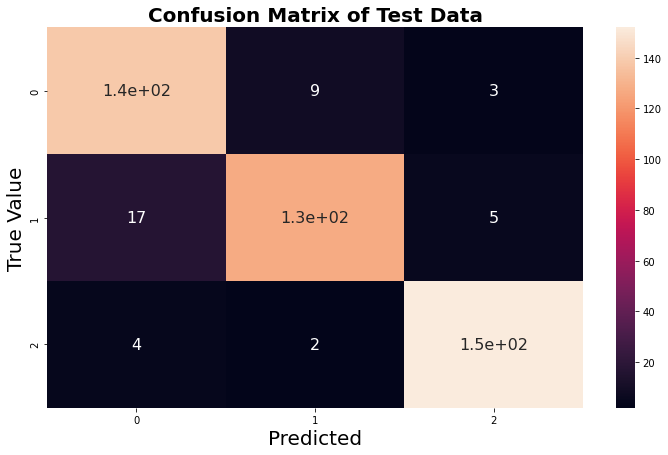

In [439]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()